In [4]:
import numpy as np
from scipy import constants
import pandas as pd
import matplotlib.pyplot as plt
from tweezer_functions import * 

#Constants in SI units
eps0 = constants.epsilon_0 
m = 39.9626*constants.atomic_mass
c = constants.c
e = constants.e
hbar = constants.hbar
pi = np.pi

# Presentations - 11/16/23

In [55]:
transitions = np.array([(393.3663*1e-9,147000000.0), (396.8469*1e-9,140000000.0)])
tweezerLams = np.linspace(350*1e-9,700*1e-9,1000)

NA = 0.5
#beamwaists = [(2*lam)/(pi * NA) for lam in tweezerLams]
beamwaists = [(0.41*lam)/(NA) for lam in tweezerLams]
power = 1e-3

sca = []
trapF = []

for i in range(len(tweezerLams)):
    sc = 0.
    po = 0.
    omegaTweezer = 2.*pi*c/tweezerLams[i]
    w0 = beamwaists[i]
    for t in transitions:
        omegaRes = 2.*pi*c/t[0]
        sc = sc + scatteringRWA(omegaTweezer,t[1],omegaRes,power,w0)
        po = po + potentialRWA(omegaTweezer,t[1],omegaRes,power,w0)
                                
    sca.append(sc)
    trapF.append(omega_radial(abs(po)/(2*pi),w0,m))
    
    

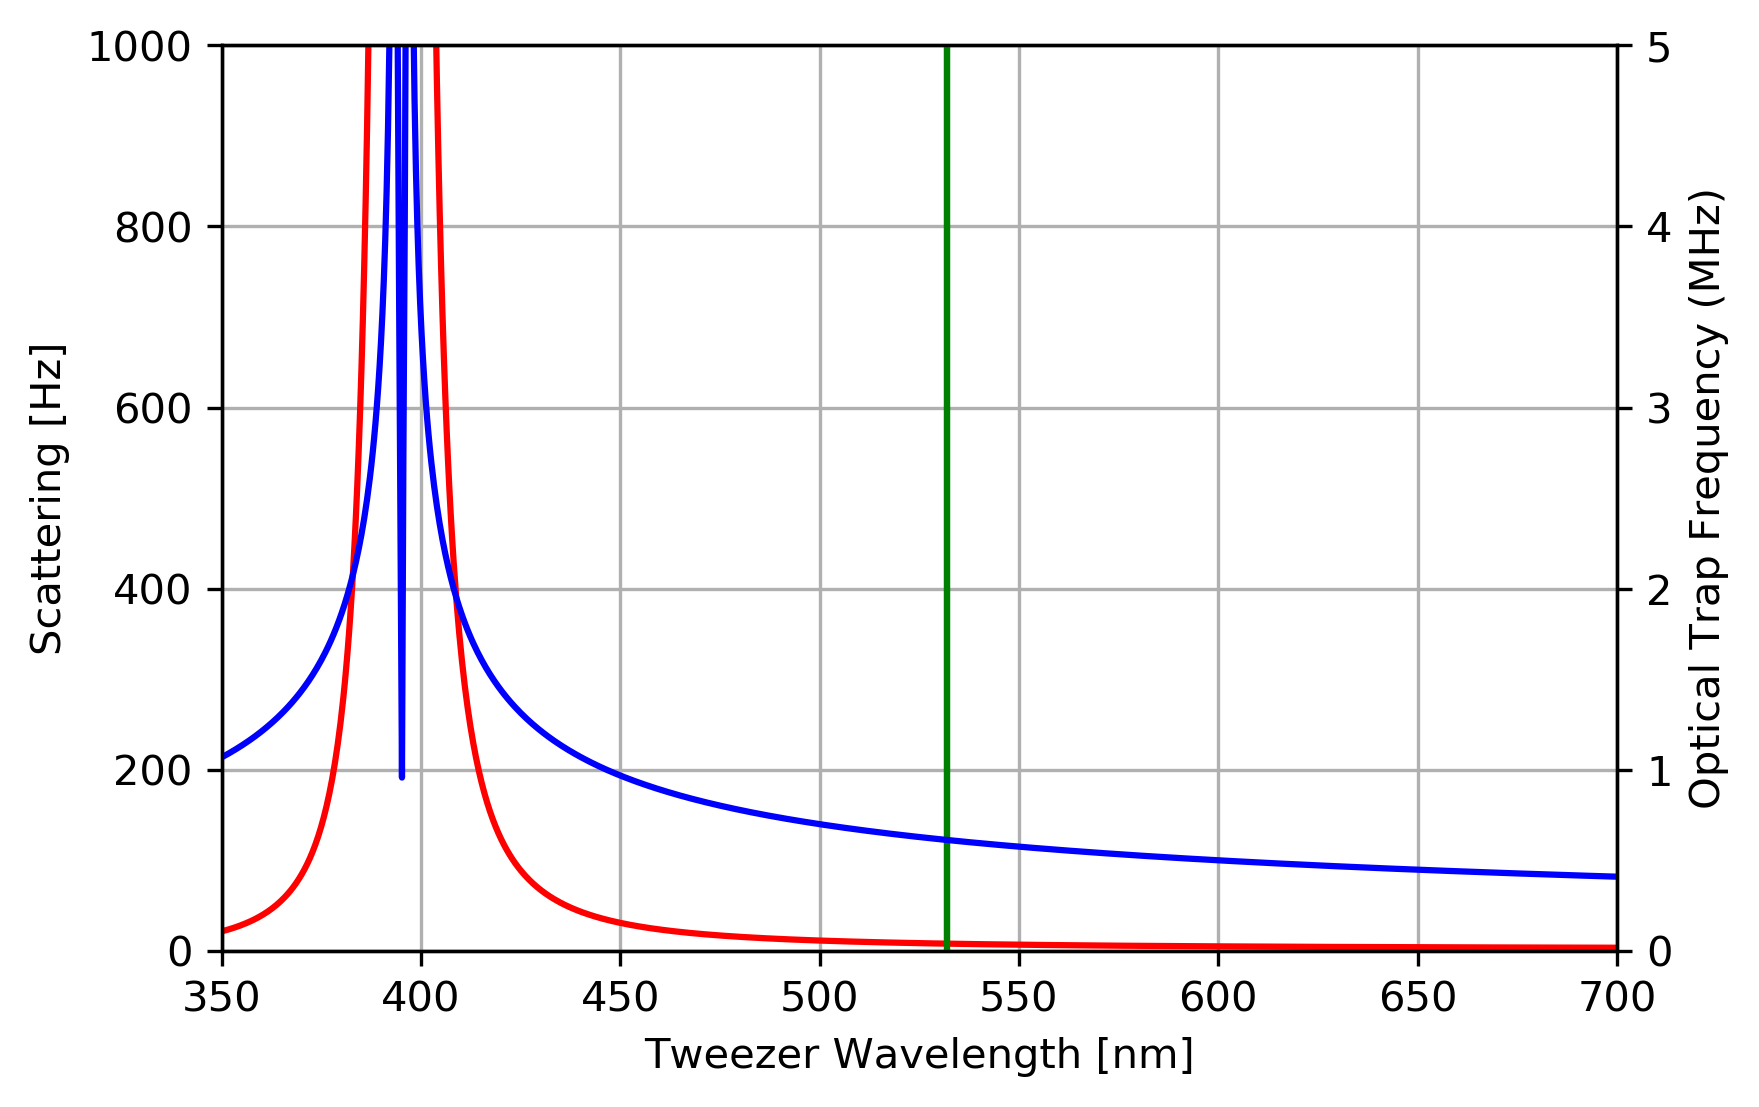

In [70]:
fig,ax = plt.subplots(1,1,figsize=(6,4),dpi = 300)


ax.plot(tweezerLams*1e9, sca, 'r')
ax.vlines(532,0,1000,'g')

ax2 = ax.twinx()
ax2.plot(tweezerLams*1e9, np.array(trapF)*1e-6, 'b')
ax2.vlines(532,0,1000,'g')


ax2.set_ylim(0,5)
ax.set_ylim(0,1000)
ax.set_xlim(350,700)
ax.set_ylabel('Scattering [Hz]')
ax.set_xlabel('Tweezer Wavelength [nm]')
ax2.set_ylabel('Optical Trap Frequency (MHz)')
ax.grid(True)
plt.show()

In [31]:
beamwaists

[2.46e-07,
 2.501414141414142e-07,
 2.542828282828283e-07,
 2.584242424242424e-07,
 2.625656565656566e-07,
 2.667070707070707e-07,
 2.7084848484848484e-07,
 2.7498989898989903e-07,
 2.791313131313131e-07,
 2.832727272727273e-07,
 2.8741414141414145e-07,
 2.9155555555555554e-07,
 2.9569696969696973e-07,
 2.9983838383838387e-07,
 3.03979797979798e-07,
 3.0812121212121215e-07,
 3.122626262626263e-07,
 3.164040404040404e-07,
 3.2054545454545456e-07,
 3.246868686868687e-07,
 3.2882828282828284e-07,
 3.32969696969697e-07,
 3.371111111111111e-07,
 3.412525252525253e-07,
 3.453939393939394e-07,
 3.495353535353536e-07,
 3.536767676767677e-07,
 3.578181818181818e-07,
 3.61959595959596e-07,
 3.6610101010101015e-07,
 3.7024242424242423e-07,
 3.7438383838383843e-07,
 3.785252525252525e-07,
 3.826666666666667e-07,
 3.8680808080808084e-07,
 3.90949494949495e-07,
 3.950909090909092e-07,
 3.992323232323233e-07,
 4.033737373737374e-07,
 4.0751515151515154e-07,
 4.116565656565657e-07,
 4.157979797979798e